## Work Summary

## 1. Load data, Define Features and Target

### 1.1 Load data

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [147]:
# Load data from file
df = pd.read_csv('../data/df_model_final.csv')

In [148]:
# Browse dataset
df.head(5)

,uid,label,time_percentage_0_to_20,time_percentage_20_to_40,time_percentage_40_to_60,time_percentage_60_to_80,time_percentage_larger_than_80,time_percentage_larger_than_80_7d_over_30d,total_play_time,total_play_time_7d_over_30d,...,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,P_7d_over_P_30d,D_7d_over_D_30d,S_7d_over_S_30d,last_P_time_from_2017-04-28,last_D_time_from_2017-04-28,last_S_time_from_2017-04-28
0,104777734,1,1.00,0.00,0.00,0.00,0.00,0.00,37,0.00,...,0,0,0,0,0.00,0.0,0.00,28,0,0
1,11596711,0,0.47,0.11,0.02,0.06,0.34,0.45,11476,0.47,...,2,3,11,21,0.36,0.0,0.14,0,0,1
2,118301183,1,0.70,0.10,0.00,0.00,0.20,0.00,611,0.00,...,0,0,0,0,0.00,0.0,0.00,27,0,0
3,151294213,1,0.81,0.00,0.00,0.13,0.06,0.00,737,0.00,...,0,0,0,0,0.00,0.0,0.00,11,0,0
4,166601616,0,0.29,0.12,0.08,0.09,0.42,0.45,7238,0.57,...,6,22,22,31,0.47,0.0,0.71,0,14,0


In [149]:
# Show summary stats
df.describe()

,uid,label,time_percentage_0_to_20,time_percentage_20_to_40,time_percentage_40_to_60,time_percentage_60_to_80,time_percentage_larger_than_80,time_percentage_larger_than_80_7d_over_30d,total_play_time,total_play_time_7d_over_30d,...,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,P_7d_over_P_30d,D_7d_over_D_30d,S_7d_over_S_30d,last_P_time_from_2017-04-28,last_D_time_from_2017-04-28,last_S_time_from_2017-04-28
count,5.843200e+04,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,5.843200e+04,58432.000000,...,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000,58432.000000
mean,1.673851e+08,0.620756,0.357923,0.058494,0.063032,0.085445,0.422201,0.095849,2.022589e+04,0.100825,...,0.349569,1.183975,2.872245,10.605045,0.100321,0.036120,0.055116,14.998939,6.881931,9.195081
std,1.038554e+07,0.485203,0.290443,0.099466,0.132124,0.173721,0.316197,0.210122,5.337275e+04,0.210832,...,2.155209,5.645728,10.787450,28.680910,0.209837,0.156055,0.173888,11.535102,10.725027,11.385494
min,9.328690e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.680335e+08,0.000000,0.110000,0.000000,0.000000,0.000000,0.130000,0.000000,5.440000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.684907e+08,1.000000,0.320000,0.020000,0.030000,0.040000,0.410000,0.000000,3.623000e+03,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,2.000000
75%,1.687740e+08,1.000000,0.540000,0.080000,0.070000,0.080000,0.670000,0.080000,1.711300e+04,0.100000,...,0.000000,0.000000,1.000000,10.000000,0.100000,0.000000,0.000000,28.000000,13.000000,20.000000
max,1.692612e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.438919e+06,1.000000,...,114.000000,398.000000,451.000000,1462.000000,1.000000,1.000000,1.000000,29.000000,29.000000,29.000000


In [150]:
# one-hot encoding
df['device_type_0'] = (df['device'] == 0).astype(int)
df['device_type_1'] = (df['device'] == 1).astype(int)

### 1.2 Define Features and Target

In [151]:
selected_features = list(df.columns.values)

In [152]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device')
selected_features

['time_percentage_0_to_20',
 'time_percentage_20_to_40',
 'time_percentage_40_to_60',
 'time_percentage_60_to_80',
 'time_percentage_larger_than_80',
 'time_percentage_larger_than_80_7d_over_30d',
 'total_play_time',
 'total_play_time_7d_over_30d',
 'average_play_time',
 'freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'P_7d_over_P_30d',
 'D_7d_over_D_30d',
 'S_7d_over_S_30d',
 'last_P_time_from_2017-04-28',
 'last_D_time_from_2017-04-28',
 'last_S_time_from_2017-04-28',
 'device_type_0',
 'device_type_1']

In [153]:
X = df[selected_features]
y = df['label']

In [154]:
X.shape

(58432, 32)

In [155]:
y[:5]

0    1
1    0
2    1
3    1
4    0
Name: label, dtype: int64

## 2. Split train-test data, and define model realted functions

### 2.1 Train-test split the data

In [156]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.2 Define model related functions

#### Train model using sklearn

In [157]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test, model):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, model)


#### Calculate the metric scores for the model

In [158]:
# define function to plot the modle performance
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred, model):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of '+ model)
    plt.legend(loc="lower right")
    plt.show()

In [159]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [160]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

## 3. Models comparison and reasoning 

### 3.1 Logistic Regression

              train      test
metrics                      
AUC        0.884195  0.886565
Accuracy   0.812001  0.814666
Precision  0.828210  0.827604
Recall     0.880340  0.883023
f1-score   0.853480  0.854416


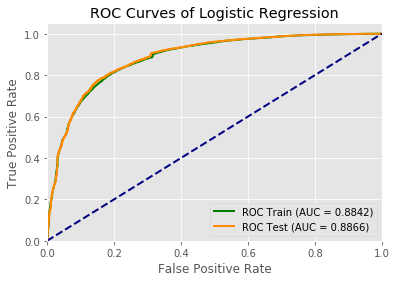

In [161]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Logistic Regression')

#### AUC of test data is 0.8866 with Logistic Regression, we will try to improve model performance with Random Forest. 

### 3.2 Random Forest

              train      test
metrics                      
AUC        0.927675  0.906158
Accuracy   0.852348  0.832891
Precision  0.862525  0.845839
Recall     0.907202  0.891081
f1-score   0.884299  0.867871


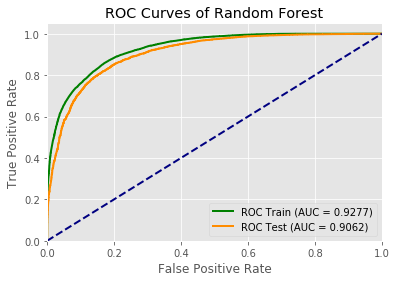

In [169]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf_rf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf_rf.fit(X_train, y_train)

# Train test model
train_test_model(clf_rf, X_train, y_train, X_test, y_test, 'Random Forest')

#### AUC of test data is 0.9065 with Random Forest, better than that of Logistic Regression with 0.8866,  because there are feature interaction and non-linearity relationship between features and target in our data set, trees algorithms can deal with these problems while logistic regression cannot.

#### We will try to further improve model performance with Gradient Boosting Trees, because in general, Gradient Boosting Trees can perform better than Random Forest, because it additionally tries to find optimal linear combination of trees (assume final model is the weighted sum of predictions of individual trees) in relation to given train data. This extra tuning may lead to more predictive power.

### 3.3 Gradient Boosting Trees

              train      test
metrics                      
AUC        0.914053  0.903622
Accuracy   0.846572  0.830838
Precision  0.858485  0.843442
Recall     0.902009  0.890664
f1-score   0.879709  0.866410


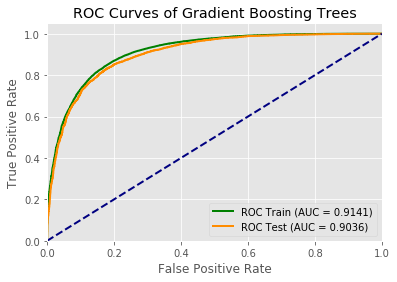

In [175]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
# parameters = {
#     'n_estimators': 100,
#     'max_depth': 5,
#     'learning_rate': 0.1,
#     'random_state': 42
# }

parameters = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'max_features':0.7,
    'random_state': 42
}

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Gradient Boosting Trees')

#### AUC of test data is 0.9036 with Gradient Boosting Trees, is close to that of Random Forest with 0.9061, means our Random forest has already performed greatly in this dataset and hard for Gradient Boosting Trees to perform better. 
### Thus, we choose Random Forest here. 
#### Next, we will try HyperParameter Tuning with Grid Search for Random Forest, to figure out whether we can do better.

##  4. HyperParameter Tuning with Grid Search

### 4.1 Random Forest HyperParameter Tuning with Grid Search

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.963180  0.905876
Accuracy   0.905059  0.830410
Precision  0.901029  0.844609
Recall     0.951916  0.888024
f1-score   0.925774  0.865773


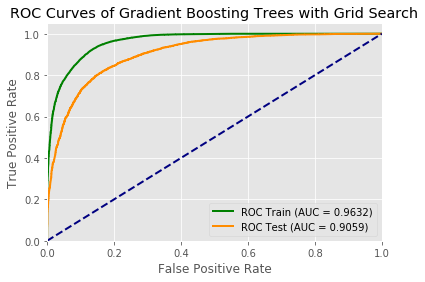

In [177]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Gradient Boosting Trees with Grid Search')

#### The AUC of the  Random Forest with Grid Search is close to that of our previous Random Forest,  means we have already get a good model.
#### We select this model to explore the features importance to get some insights

## 5. Explore features importance to get insights

### 5.1 Top 10 features analysis

#### The plot below shows the ranked feature importance generated by Random Forest:

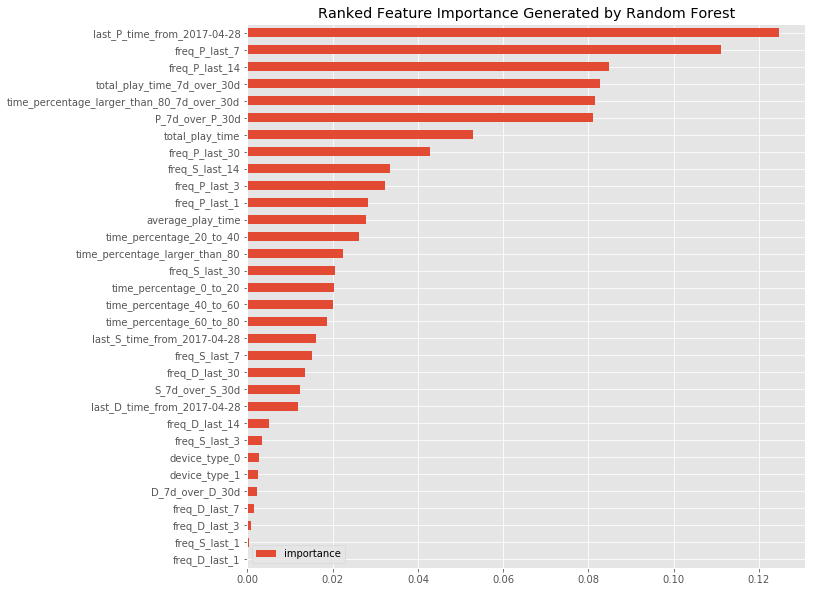

In [178]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh(figsize = (10, 10))
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
ax.set_title('Ranked Feature Importance Generated by Random Forest')
plt.show()

#### As we can see, the top 10 features are:

### 5.2 Business model and stage analysis

####  As we are not told what business the music box is running, we will analyze different scenarios to figure out what we can do to reactive users with high churn probability.

#### Of course, we need to consider two factors before offering free trial, discount or freemonth : 

#### We can calculate the churn rate to make a guess what stage our music box is in: 

In [167]:
# churn_rate = count of 1 / (count of 0 + count of 1)
churn_count = df['label'].value_counts()
churn_rate = round(churn_count[1] / (churn_count[0] + churn_count[1]), 2)
print('Churn rate is: ' + str(churn_rate))

Churn rate is: 0.62


#### As the music box has a very high churn rate of 0.62, we conclude it's in the 'Stickiness' stage, thus offering free trial, discount or freemonth is reasonable, and sending e-mail which is applicable to every business model is also good choice.

### 5.3 Insights 

#### By analyzing the top 10 features and business model above, we have some insights:

#### Generate the churn probability of every user and rank

In [168]:
churn_probability_by_uid = pd.DataFrame({'uid':df['uid'].values, 'churn_probality':clf.predict_proba(X)[:,1]})
churn_probability_by_uid = churn_probability_by_uid.sort_values(by = 'churn_probality', ascending=False)
churn_probability_by_uid.head(5)

,uid,churn_probality
23403,167579404,0.992385
34738,168074891,0.992385
9010,168060616,0.992385
26701,168063033,0.992297
5,167570658,0.992033


#### Besides the three insights mentioned above, I think we can do more to reduce the churn rate, like: